Data Description: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [ ]:
import pandas as pd 
from pandas import DataFrame
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import roc_auc_score

## Data Cleaning & Preparation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hotel Cancelation Prediction without data standardization.csv to Hotel Cancelation Prediction without data standardization.csv


In [ ]:
df=pd.read_csv('Hotel Cancelation Prediction without data standardization.csv')

In [ ]:
print(df.shape)
print(df.columns.values)
print(df.head(10))

(119390, 19)
['is_canceled' 'lead_time' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'is_repeated_guest' 'previous_cancellations'
 'origin_Portugal' 'reserved_standard_room' 'made_booking_changes'
 'made_special_requests' 'come_alone' 'with_chilren' 'no_deposit'
 'travel_agents/tour_operators_distributed' 'direct_distributed'
 'online_purchased' 'arrival_peak_season' 'arrival_middle_season'
 'city_hotel']
   is_canceled  lead_time  ...  arrival_middle_season  city_hotel
0            0        342  ...                      0           0
1            0        737  ...                      0           0
2            0          7  ...                      0           0
3            0         13  ...                      0           0
4            0         14  ...                      0           0
5            0         14  ...                      0           0
6            0          0  ...                      0           0
7            0          9  ...                      0     

In [ ]:
print(df.isnull().sum())

is_canceled                                 0
lead_time                                   0
stays_in_weekend_nights                     0
stays_in_week_nights                        0
is_repeated_guest                           0
previous_cancellations                      0
origin_Portugal                             0
reserved_standard_room                      0
made_booking_changes                        0
made_special_requests                       0
come_alone                                  0
with_chilren                                0
no_deposit                                  0
travel_agents/tour_operators_distributed    0
direct_distributed                          0
online_purchased                            0
arrival_peak_season                         0
arrival_middle_season                       0
city_hotel                                  0
dtype: int64


In [ ]:
df_clean = df.copy()

In [ ]:
# make sure the data type
cvar_list = ['is_canceled', 'is_repeated_guest', 'previous_cancellations', 'origin_Portugal', 'reserved_standard_room', 'made_booking_changes', 'made_special_requests', 'come_alone', 'with_chilren', 'no_deposit', 'travel_agents/tour_operators_distributed', 'direct_distributed', 'online_purchased', 'city_hotel', 'arrival_middle_season', 'arrival_peak_season']
nvar_list = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']
df_clean[cvar_list] = df_clean[cvar_list].astype('category')
df_clean[nvar_list] = df_clean[nvar_list].astype('float64')

In [ ]:
print(df_clean.isnull().sum())

is_canceled                                 0
lead_time                                   0
stays_in_weekend_nights                     0
stays_in_week_nights                        0
is_repeated_guest                           0
previous_cancellations                      0
origin_Portugal                             0
reserved_standard_room                      0
made_booking_changes                        0
made_special_requests                       0
come_alone                                  0
with_chilren                                0
no_deposit                                  0
travel_agents/tour_operators_distributed    0
direct_distributed                          0
online_purchased                            0
arrival_peak_season                         0
arrival_middle_season                       0
city_hotel                                  0
dtype: int64


In [ ]:
print(df_clean.shape)

(119390, 19)


# 2. Export dataset for Classification Tree 
#     (without Data Standardization)
#     file name: Hotel Cancelation Prediction without data standardization.csv

In [ ]:
# df_clean.to_csv('Hotel Cancelation Prediction without data standardization.csv')

# 3. Data Partition

In [ ]:
# split data into test_part and nontest_part
df_sample1 = df_clean.copy()
df4partition = df_sample1
testpart_size = 0.2
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)
print(df_nontestData)

      is_canceled  lead_time  ...  arrival_middle_season  city_hotel
31386           0      156.0  ...                      0           0
1789            0       84.0  ...                      1           0
685             1       87.0  ...                      0           0
77349           1      190.0  ...                      1           1
7814            1        8.0  ...                      0           0
...           ...        ...  ...                    ...         ...
50057           1      142.0  ...                      1           1
98047           0       74.0  ...                      1           1
5192            1       50.0  ...                      1           0
77708           0        0.0  ...                      1           1
98539           0      120.0  ...                      1           1

[95512 rows x 19 columns]


In [ ]:
DV = 'is_canceled'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

In [ ]:
# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

In [ ]:
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

In [ ]:
def profit_calculation(model, x_value, y_value):
  d_cutoff = 1/2

  decision = list(model.predict_proba(x_value)[:,1] < d_cutoff)   
  decision = list(model.predict(x_value))
  y = list(y_value)
  n_obs = len(y)
    
  cum_profit = 0

  for i in range(n_obs):
      if decision[i] == True and y[i] == 1: 
          profit = 0 
      elif decision[i] == True and y[i] == 0: 
          profit = 8 
      elif decision[i] == False and y[i] == 1: 
            profit = -2
      else:
            profit = 10 
      cum_profit = cum_profit + profit 

  average_net_profit = cum_profit / n_obs 
  return average_net_profit

In [ ]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(profit_calculation, greater_is_better=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring=profit_calculation, cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.149469 to fit



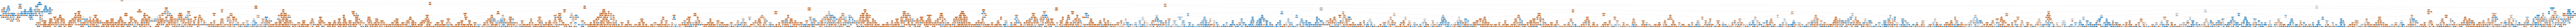

In [ ]:
Image(summary_tree(clf_BPT))

In [ ]:
print(profit_calculation(clf_BPT, X, y))

5.980798224306893
